**CAPTCHA GENERATOR**

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

ValueError: mount failed: timeout during initial read of root folder; for more info: https://research.google.com/colaboratory/faq.html#drive-timeout

In [ ]:
SavedPictures = '/content/drive/MyDrive/Saved Pictures'
ArabicAlphabets = '/content/drive/MyDrive/ArabicAlphabets.txt'                           # Affiche le contenu du fichier
with open(ArabicAlphabets, 'r') as file:
    print(file.read())


a.png أ
aa.jpg ء
aaa.jpg ء
aaaa.jpg ء
ach.jpg ش
ae.jpg أ
ag.jpg ه
aha.png ح
Ala.jpg ء
alfa.jpg ء
alif.jpg أ
ayay.jpg ي
ayn.png ع
azaa.jpg ء
azaza.jpg ء
b.png ب
bb.jpg ب
bbb.jpg ب
bbbb.jpg ب
bblk.jpg ب
bl.jpg ب
blb.jpg ب
bllb.jpg ب
cc.jpg ل
ch.png ش
cha.jpg ش
chac.jpg ش
chach.jpg ش
chachac.jpg ش
chc.jpg ش
chcc.jpg ش
daa.jpg ض
dh.jpg ض
dha.jpg ض
dha.png ذ
dhaa.png ظ
dhaahd.jpg ظ
dhad.png ض
dhadha.jpg ض
dhamn.jpg ظ
dlm.jpg م
e.jpg أ
ee.jpg أ
eee.jpg أ
eeee.jpg أ
eeeee.jpg أ
f.jpg ف
fa.jpg ف
faa.jpg ف
fafa.jpg ف
ff.jpg ف
fff.jpg ف
fkf.jpg ك
fkk.jpg ك
flfl.jpg ف
g.jpg ه
gag.jpg ه
gg.jpg ه
ggg.jpg ه
gggg.jpg ه
gh.jpg غ
gh.png غ
ghayn.jpg غ
ghf.jpg ظ
ghgh.jpg غ
ghghghg.jpg غ
gtd.jpg ل
h.jpg ح
h.png ه
ha.jpg ح
haa.jpg ح
haaaa.jpg ح
hahrf.jpg ح
hamza.png ء
hd.png د
hg.jpg غ
hgg.jpg غ
hgh.jpg غ
hh.jpg ح
hhh.jpg ح
hk.jpg خ
holm.jpg ح
i.png إ
iiu.jpg ك
iu.jpg ك
iy.jpg ي
iyiy.jpg ي
iyiyi.jpg ي
iyy.jpg ي
k.png ك
kaf.jpg ق
kaf.png ق
kafk.jpg ق
kafka.jpg ق
kafkaf.jpg ق
kff.jpg ك
kfk.jpg ك
kh.jpg خ
kha

In [ ]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import pandas as pd

# Taille du captcha
CAPTCHA_WIDTH = 300
CAPTCHA_HEIGHT = 200

# Taille réduite des images
IMAGE_WIDTH = 50
IMAGE_HEIGHT = 50

# Nombre de captchas à générer (change to 100)
NUM_CAPTCHAS = 1000

# Créer le dossier pour sauvegarder les captchas s'il n'existe pas déjà
if not os.path.exists('captchas'):
    os.makedirs('captchas')

# Charger les correspondances entre les noms de fichiers et les lettres arabes depuis le fichier ArabicAlphabets.txt
arabic_alphabets = {}
with open('/content/drive/MyDrive/ArabicAlphabets.txt', 'r') as file:
    for line in file:
        if line.strip() == '':
            continue
        image_name, arabic_letter = line.strip().split(' ')
        arabic_alphabets[image_name] = arabic_letter

# Load your image data
path = '/content/drive/MyDrive/Saved Pictures'
images = [os.path.join(path, img) for img in os.listdir(path) if img.endswith('.jpg')]

# Check if there are enough images
if len(images) == 0:
    raise ValueError("No images found in the folder to create the captcha.")

# Fonction pour générer une taille aléatoire pour les formes
def random_shape_size():
    return random.randint(5, 20)  # Taille moyenne et petite seulement

# Créer une liste pour stocker les mots de captcha
captchas_list = []

# Boucle pour générer les captchas
for captcha_index in range(NUM_CAPTCHAS):
    # Randomly select images
    num_selected_images = min(len(images), 5)
    selected_images = random.sample(images, num_selected_images)

    # Create a new CAPTCHA image
    captcha_image = Image.new('RGB', (CAPTCHA_WIDTH, CAPTCHA_HEIGHT), color='white')
    draw = ImageDraw.Draw(captcha_image)

    font = ImageFont.load_default()

    # Place the images in the captcha
    total_width = len(selected_images) * IMAGE_WIDTH
    x_offset = (CAPTCHA_WIDTH - total_width) // 2

    captcha_word = ""  # Variable pour stocker les lettres du captcha

    for img_path in selected_images:
        img = Image.open(img_path)
        img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))  # Redimensionner l'image

        # Obtenez le nom de fichier de l'image
        img_filename = os.path.basename(img_path)

        # Trouver la lettre associée à l'image dans le fichier ArabicAlphabets.txt
        arabic_letter = arabic_alphabets.get(img_filename)

        # Ajouter la lettre au mot du captcha (avec inversion)
        captcha_word = arabic_letter + captcha_word

        # Coller l'image dans le captcha
        captcha_image.paste(img, (x_offset, (CAPTCHA_HEIGHT - IMAGE_HEIGHT) // 2))

        # Mettre à jour le décalage horizontal pour la prochaine image
        x_offset += IMAGE_WIDTH

    # Ajouter des formes vides (cercle, ligne, rectangle, carré) de tailles moyenne et petite
    num_shapes = 5
    for _ in range(num_shapes):
        shape_type = random.choice(["circle", "line", "rectangle", "square"])
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        if shape_type == "circle":
            center = (random.randint(0, CAPTCHA_WIDTH), random.randint(0, CAPTCHA_HEIGHT))
            radius = random_shape_size()  # Taille aléatoire pour les cercles
            draw.ellipse([center[0] - radius, center[1] - radius, center[0] + radius, center[1] + radius], outline=color)
        elif shape_type == "line":
            start = (random.randint(0, CAPTCHA_WIDTH), random.randint(0, CAPTCHA_HEIGHT))
            end = (random.randint(0, CAPTCHA_WIDTH), random.randint(0, CAPTCHA_HEIGHT))
            draw.line([start, end], fill=color, width=2)
        elif shape_type == "rectangle":
            x1 = random.randint(0, CAPTCHA_WIDTH - 30)  # Largeur maximale de 30 pixels pour les rectangles
            y1 = random.randint(0, CAPTCHA_HEIGHT - 30)  # Hauteur maximale de 30 pixels pour les rectangles
            width = random_shape_size()  # Largeur aléatoire pour les rectangles
            height = random_shape_size()  # Hauteur aléatoire pour les rectangles
            draw.rectangle([x1, y1, x1 + width, y1 + height], outline=color)
        elif shape_type == "square":
            x = random.randint(0, CAPTCHA_WIDTH - 30)  # Largeur maximale de 30 pixels pour les carrés
            y = random.randint(0, CAPTCHA_HEIGHT - 30)  # Hauteur maximale de 30 pixels pour les carrés
            side_length = random_shape_size()  # Longueur du côté aléatoire pour les carrés
            draw.rectangle([x, y, x + side_length, y + side_length], outline=color)

    # Enregistrer le captcha dans le dossier "captchas"
    captcha_image_path = f'captchas/captcha_{captcha_index + 1}.png'
    captcha_image.save(captcha_image_path)

    # Ajouter le mot de captcha à la liste
    captchas_list.append({'Captcha Number': captcha_index + 1, 'Captcha Word': captcha_word})

# Créer un DataFrame à partir de la liste des captchas
df = pd.DataFrame(captchas_list)

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv('captchas.csv', encoding='utf-8', index=False)

print("Les captchas ont été générés avec succès et enregistrés dans le fichier captchas.csv.")


Les captchas ont été générés avec succès et enregistrés dans le fichier captchas.csv.


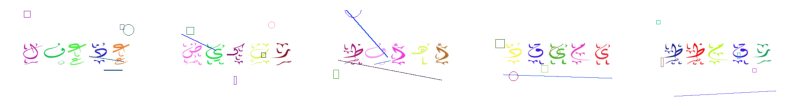

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Chemin du dossier contenant les captchas
captcha_folder = 'captchas'

# Nombre d'images à visualiser
num_images_to_display = 5

# Liste des noms de fichiers des captchas
captcha_files = os.listdir(captcha_folder)

# Afficher les premières images
plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    captcha_path = os.path.join(captcha_folder, captcha_files[i])
    captcha_image = Image.open(captcha_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(captcha_image)
    plt.axis('off')

plt.show()

In [ ]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv('captchas.csv')

# Afficher le DataFrame complet
print(df)


      Captcha Number Captcha Word
0                  1        نمبلف
1                  2        سغوعظ
2                  3        كنهبط
3                  4        ليسظد
4                  5        حطددف
...              ...          ...
4995            4996        فخكقف
4996            4997        شصيهق
4997            4998        بكءغر
4998            4999        رسحيأ
4999            5000        ثلدزي

[5000 rows x 2 columns]


In [ ]:
import os
import pandas as pd

# Chemin des dossiers
folder_path_X = '/content/captchas'  # Dossier X
folder_path_y = '/content/captchas.csv'  # Dossier y

# Compter le nombre de fichiers dans le dossier X
num_files_X = len([name for name in os.listdir(folder_path_X) if os.path.isfile(os.path.join(folder_path_X, name))])

# Lire le fichier CSV en spécifiant que la première ligne est un en-tête
df = pd.read_csv(folder_path_y, header=0)

# Compter le nombre de lignes dans le fichier CSV (le nombre d'étiquettes y)
num_lines_y = len(df)

# Afficher les résultats
print("Nombre de fichiers dans le dossier X:", num_files_X)
print("Nombre de lignes dans le fichier CSV (nombre d'étiquettes y):", num_lines_y)


Nombre de fichiers dans le dossier X: 1000
Nombre de lignes dans le fichier CSV (nombre d'étiquettes y): 1000


In [ ]:
import shutil

# Créer une archive zip du dossier "captchas"
shutil.make_archive('captchas_download', 'zip', 'captchas')

# Télécharger le fichier zip
from google.colab import files
files.download('captchas_download.zip')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Chemin du dossier contenant les images
folder_path = '/content/captchas'

# Chemin du fichier CSV
csv_file_path = '/content/captchas.csv'

# Charger le fichier CSV
df = pd.read_csv(csv_file_path)

# Diviser les données en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Vérifier le nombre d'images dans chaque ensemble
print("Nombre d'images dans l'ensemble d'entraînement :", len(train_df))
print("Nombre d'images dans l'ensemble de test :", len(test_df))




Nombre d'images dans l'ensemble d'entraînement : 800
Nombre d'images dans l'ensemble de test : 200


In [ ]:
print("Nombre de classes dans label_encoder:", len(label_encoder.classes_))
print("Forme de la sortie de la couche de sortie du modèle:", model.layers[-1].output_shape)


Nombre de classes dans label_encoder: 1000
Forme de la sortie de la couche de sortie du modèle: (None, 1000)


**Model**

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Charger les données à partir du fichier CSV
data = pd.read_csv('/content/captchas.csv')

# Prétraitement des images
images = []
for i in range(len(data)):
    image = cv2.imread('/content/captchas/captcha_' + str(data['Captcha Number'][i]) + '.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convertir en niveau de gris si nécessaire
    # Autres opérations de prétraitement selon vos besoins (redimensionnement, normalisation, etc.)
    images.append(image)

images = np.array(images)  # Convertir en tableau numpy

# Redimensionner les images pour inclure la dimension des canaux
images = np.expand_dims(images, axis=-1)

# Encodage des étiquettes
labels = to_categorical(data['Captcha Number'] - 1, num_classes=len(data))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Construction du modèle CNN (exemple)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(data), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
25/25 [==============================] - 86s 3s/step - loss: 97.9166 - accuracy: 0.0000e+00 - val_loss: 6.9185 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 78s 3s/step - loss: 6.8736 - accuracy: 0.0150 - val_loss: 6.9773 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 80s 3s/step - loss: 6.5227 - accuracy: 0.0413 - val_loss: 7.7889 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 82s 3s/step - loss: 4.6465 - accuracy: 0.1850 - val_loss: 9.9986 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 83s 3s/step - loss: 1.5512 - accuracy: 0.6662 - val_loss: 17.3901 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 82s 3s/step - loss: 0.2437 - accuracy: 0.9513 - val_loss: 22.4535 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 83s 3s/step - loss: 0.0453 - accuracy: 0.9925 - val_loss: 23.3259 - val_accur

Epoch 1/5
13/13 [==============================] - 81s 6s/step - loss: 0.0019 - accuracy: 0.9987 - val_loss: 24.5235 - val_accuracy: 0.0000e+00
Epoch 2/5
13/13 [==============================] - 77s 6s/step - loss: 6.8887e-04 - accuracy: 1.0000 - val_loss: 24.9753 - val_accuracy: 0.0000e+00
Epoch 3/5
13/13 [==============================] - 80s 6s/step - loss: 3.8364e-04 - accuracy: 1.0000 - val_loss: 25.5667 - val_accuracy: 0.0000e+00
Epoch 4/5
13/13 [==============================] - 78s 6s/step - loss: 2.7910e-04 - accuracy: 1.0000 - val_loss: 26.1187 - val_accuracy: 0.0000e+00
Epoch 5/5
13/13 [==============================] - 76s 6s/step - loss: 2.1452e-04 - accuracy: 1.0000 - val_loss: 26.5226 - val_accuracy: 0.0000e+00


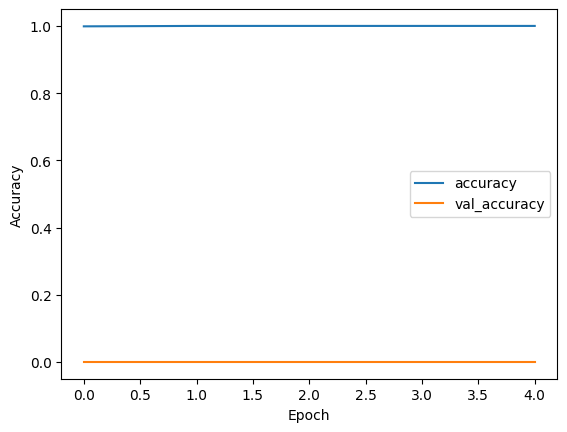

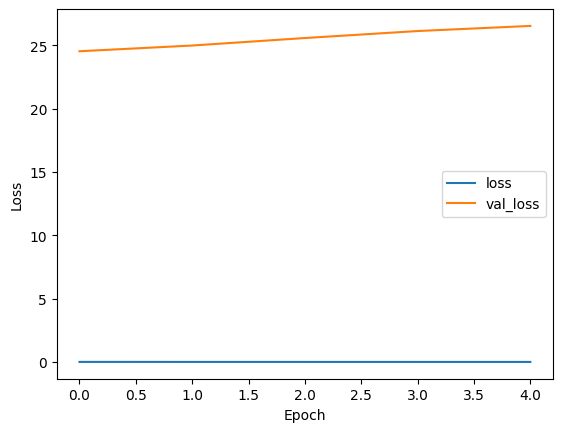

In [ ]:
import matplotlib.pyplot as plt

# Entraînement du modèle avec enregistrement de l'historique
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Affichage des courbes de l'accuracy et de la loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**`Arabic Handwritten Characters Classification`** 📝

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Créer le modèle
model = Sequential([
    Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(300, 200, 3)),
    Conv2D(32, (5, 5), activation="relu"),
    Conv2D(32, (5, 5), activation="relu"),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (5, 5), padding="same", activation="relu"),
    Conv2D(64, (5, 5), activation="relu"),
    Conv2D(64, (5, 5), activation="relu"),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dropout(0.4),

    Dense(28, activation="softmax")
])

# Afficher le sommaire du modèle
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 300, 200, 32)      2432      
                                                                 
 conv2d_4 (Conv2D)           (None, 296, 196, 32)      25632     
                                                                 
 conv2d_5 (Conv2D)           (None, 292, 192, 32)      25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 146, 96, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 146, 96, 32)       128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 96, 64)      

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Charger les données à partir du fichier CSV
data = pd.read_csv('/content/captchas.csv')

# Prétraitement des images
images = []
for i in range(len(data)):
    image = cv2.imread('/content/captchas/captcha_' + str(data['Captcha Number'][i]) + '.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convertir en niveau de gris si nécessaire
    # Autres opérations de prétraitement selon vos besoins (redimensionnement, normalisation, etc.)
    images.append(image)

images = np.array(images)  # Convertir en tableau numpy

# Redimensionner les images pour inclure la dimension des canaux
images = np.expand_dims(images, axis=-1)

# Encodage des étiquettes
labels = to_categorical(data['Captcha Number'] - 1, num_classes=len(data))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Construction du modèle CNN (exemple)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(data), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
25/25 [==============================] - 79s 3s/step - loss: 235.9538 - accuracy: 0.0025 - val_loss: 6.9481 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 84s 3s/step - loss: 6.9060 - accuracy: 0.0012 - val_loss: 6.9333 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 78s 3s/step - loss: 6.9004 - accuracy: 0.0000e+00 - val_loss: 6.9521 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 85s 3s/step - loss: 6.8955 - accuracy: 0.0012 - val_loss: 6.9710 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 78s 3s/step - loss: 6.8903 - accuracy: 0.0050 - val_loss: 6.9910 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 85s 3s/step - loss: 6.8838 - accuracy: 0.0113 - val_loss: 7.0159 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 77s 3s/step - loss: 6.8731 - accuracy: 0.0137 - val_loss: 7.0509 - val_accurac

Epoch 1/10
25/25 [==============================] - 87s 3s/step - loss: 5.1720 - accuracy: 0.0787 - val_loss: 11.5486 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 82s 3s/step - loss: 3.2456 - accuracy: 0.3388 - val_loss: 17.4084 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 80s 3s/step - loss: 1.3126 - accuracy: 0.6975 - val_loss: 30.9565 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 83s 3s/step - loss: 0.3496 - accuracy: 0.9087 - val_loss: 35.3870 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 80s 3s/step - loss: 0.1109 - accuracy: 0.9787 - val_loss: 43.1614 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 93s 4s/step - loss: 0.0429 - accuracy: 0.9900 - val_loss: 46.9784 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 80s 3s/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 48.4395 - val_accura

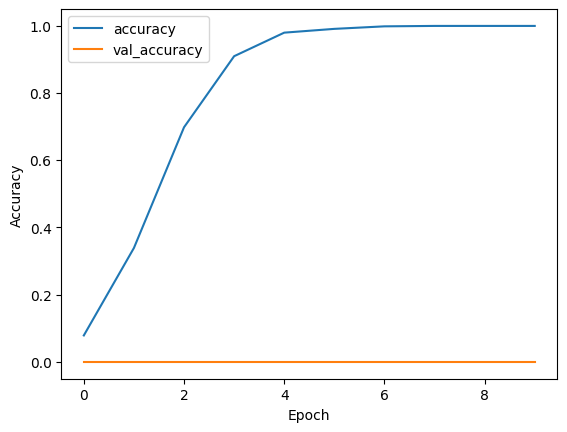

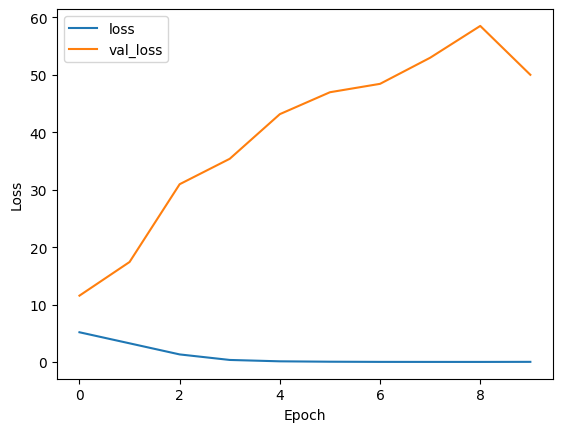

In [ ]:
import matplotlib.pyplot as plt

# Entraînement du modèle avec enregistrement de l'historique
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Affichage des courbes de l'accuracy et de la loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Data**

In [ ]:
!pip install python-bidi

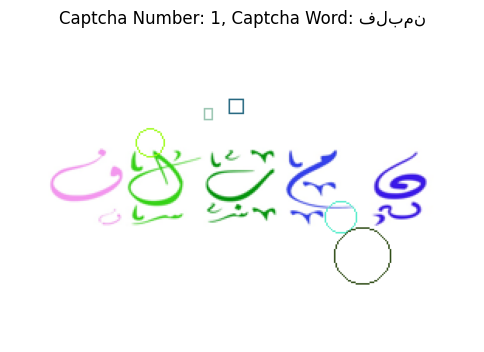

In [ ]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

# Chemin du dossier contenant les captchas
captcha_folder = 'captchas'

# Chemin du fichier CSV contenant les mots de captcha
captcha_csv = 'captchas.csv'

# Charger les données du fichier CSV
df = pd.read_csv(captcha_csv, nrows=1)

# Afficher l'image du premier captcha
captcha_path = os.path.join(captcha_folder, 'captcha_1.png')
captcha_image = Image.open(captcha_path)

# Récupérer le numéro de captcha et le mot de captcha
captcha_number = df.iloc[0, 0]
captcha_word = df.iloc[0, 1]

# Afficher le mot en arabe de droite à gauche
captcha_word_display = get_display(captcha_word)

# Afficher l'image du captcha_1.png avec le numéro et le mot de captcha
plt.figure(figsize=(6, 6))
plt.imshow(captcha_image)
plt.title(f'Captcha Number: {captcha_number}, Captcha Word: {captcha_word_display}')
plt.axis('off')
plt.show()

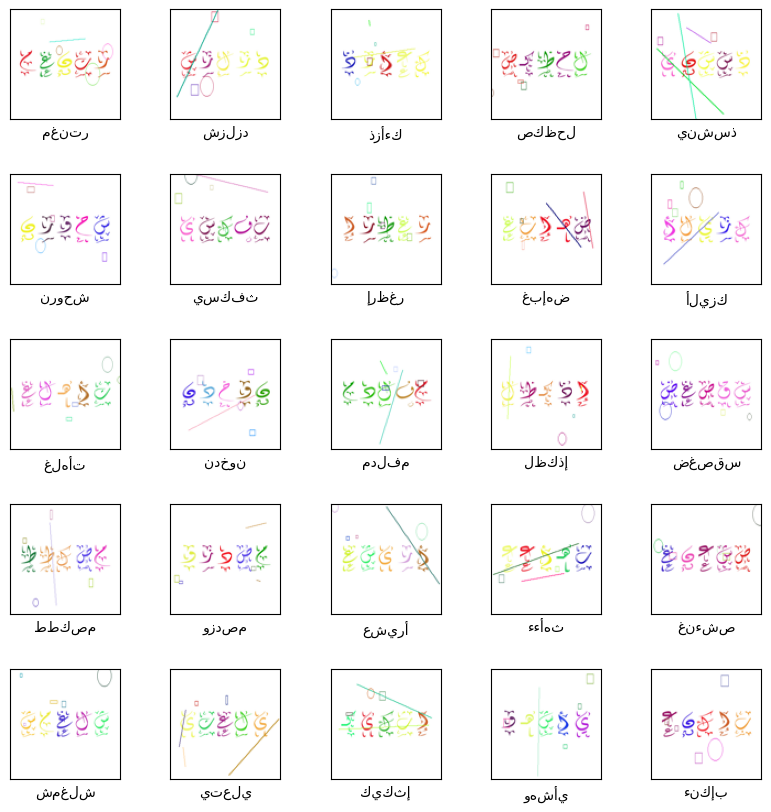

In [ ]:
import os
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

# Chemin du dossier contenant les captchas
captcha_folder = 'captchas'

# Chemin du fichier CSV contenant les mots de captcha
captcha_csv = 'captchas.csv'

# Charger les données du fichier CSV
df = pd.read_csv(captcha_csv, nrows=25)  # Charger les 25 premières lignes

# Taille de redimensionnement des images
new_width = 100
new_height = 100

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])

    # Charger l'image du captcha
    captcha_path = os.path.join(captcha_folder, f'captcha_{i + 1}.png')
    captcha_image = Image.open(captcha_path)

    # Redimensionner l'image
    captcha_image = captcha_image.resize((new_width, new_height))

    # Récupérer le mot de captcha
    captcha_word = df.iloc[i, 1]

    # Afficher le mot en arabe de droite à gauche
    captcha_word_display = get_display(captcha_word)

    # Afficher l'image avec le mot de captcha
    plt.imshow(captcha_image)
    plt.xlabel(captcha_word_display, fontsize=10, ha='center')

plt.subplots_adjust(hspace=0.5)
plt.show()